### Minimum graph coloring/ Minimum chromatic number

Problem definition: https://www8.cs.umu.se/kurser/TDBAfl/VT06/algorithms/COMPEND/COMPED11/NODE13.HTM#SECTION00021500000000000000

Assignment based ILP-formulation (e.g. see here: https://arxiv.org/abs/1706.10191):
Let a graph $G=(V,E)$ with vertex set $V$ and edge set $E$ be given.
We model the decision via variables $x_{vi}\in\{0,1\}$, that take value $1$ if vertex $v\in V$ is assigned color $i$ and $0$ otherwise.

Further, let $H$ be an upper bound for the chromatic number, i.e. $H\le|V|$, but usually smaller as it could come from, e.g., the greedy coloring algorithm (https://en.wikipedia.org/wiki/Greedy_coloring). $w_{i}$ takes value $1$ if color $i=1,\ldots H$ is used in the assignment and $0$ otherwise.

\begin{align}
    &\min \sum_{1\le i \le H}w_{i} \text{ (minimize the total number of colors used) }\\
    &\text{s.t.} \\
    &\sum_{i=1}^{H} x_{vi} = 1\;\forall v\in V \text{ (make sure every vertex gets exactly one color) } \\
    &x_{ui}+x_{vi}\le w_{i}\;\forall(u,v)\in E, i=1,\ldots,H\text{ (make sure no two neighboring vertices get the same color) } \\
    &x_{vi},w_{i}\in\{0,1\}\;\forall v\in V, i=1,\ldots, H \text{ (assigning a color or not is a binary decision) }
\end{align}


In [1]:
import gurobipy as gp
import networkx as nx

In [2]:
from min_vertex_coloring import *

In [3]:
import sys
import os

sys.path.append(os.path.abspath('../../'))
from graphilp.imports import networkx as imp_nx

#### Create test graphs

In [4]:
#create cycle graphs as test cases. we know odd cycles have chromatic number 3 and even cycles have chromatic number 2
G_odd_init = nx.cycle_graph(n=5)
G_even_init = nx.cycle_graph(n=4)

In [5]:
#create ILPGraph objects
G_odd = imp_nx.read(G_odd_init)
G_even = imp_nx.read(G_even_init)

In [6]:
#create test models
m_odd = createModel(G_odd)
m_even = createModel(G_even)

Using license file /opt/gurobi/gurobi.lic


In [7]:
#run optimization
m_odd.optimize()

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (linux64)
Optimize a model with 22 rows, 18 columns and 64 nonzeros
Model fingerprint: 0xcf0e25fc
Variable types: 0 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 20 rows, 16 columns, 50 nonzeros
Variable types: 0 continuous, 16 integer (16 binary)

Root relaxation: objective 2.000000e+00, 10 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 infeasible    0         3.00000    3.00000  0.00%     -    0s

Explored 0 nodes (14 simplex iterations) in 0.01 seconds
Thread count was 12 (of 12 available processors)

Solution count 1: 3 

Optimal solut

In [8]:
m_even.optimize()

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (linux64)
Optimize a model with 13 rows, 10 columns and 34 nonzeros
Model fingerprint: 0x5bb5c96c
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 13 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 12 available processors)

Solution count 1: 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%


#### Inspect solutions

In [9]:
color_assignment_even, node_to_col_even = extractSolution(G_even, m_even)
colors_even = colors_list_from_assignment_dict(G_even, color_assignment_even)

In [10]:
#visualize solution
nx.draw_circular(G_even.G, node_color=colors_even)

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [11]:
color_assignment_odd, node_to_col_odd = extractSolution(G_odd, m_odd)
colors_odd = colors_list_from_assignment_dict(G_odd, color_assignment_odd)

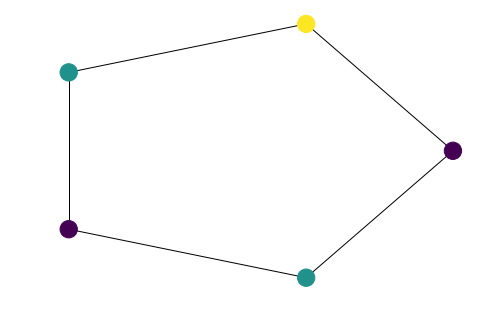

In [12]:
nx.draw_circular(G_odd.G, node_color=colors_odd)

In [13]:
col_to_node, node_to_col = greedyColoring(G_even)

In [14]:
colors = colors_list_from_assignment_dict(G_even, col_to_node)

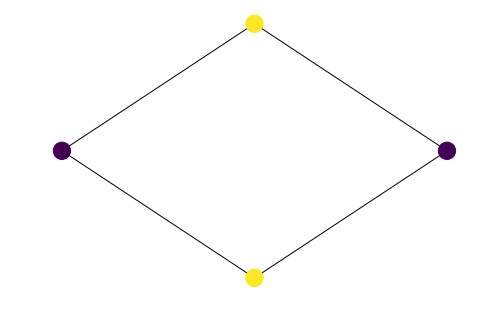

In [15]:
nx.draw_circular(G_even.G, node_color=colors)